In [1]:
from IPython.display import display, Image, SVG, HTML

In [2]:
%%javascript
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });

<IPython.core.display.Javascript object>

Le Jupyter notebook qui est utilisé pour construire l'article est disponible 
<a href="https://github.com/vfreysz/Equi_Thermo_py/blob/master/Equilibre_thermodynamique.ipynb">ici</a>

# Introduction

Nous allons traiter de l'équilibre thermodynamique d'un gazeifieur. 
Un gazeifieur permet d'effectuer une gazéification qui au sens large couvre la conversion de tout combustible carboné en produit gazeux ayant un pouvoir calorifique exploitable. 
Plus concrètement, on utilise de la matière végétale, du charbon, des déchets, qui sont transformés en produits, notamment gazeux, qui peuvent être utilisés pour la production de chaleur, d’électricité, de carburants de substitution ou d’hydrogène. 
Un gazeifieur est influencé par de très nombreux paramètres, mais la pression et la température sont deux des plus importants. 
En fonction de ces deux paramètres, la composition de sortie peut être complètement modifiée. 
L'équilibre thermodynamique permet d'avoir une première estimation de la composition de sortie fonction de ces deux paramètres, c'est ce que nous allons voir par la suite. 

# Équilibre thermodynamique

Des calculs thermodynamiques basés sur l'utilisation de bases de données peuvent nous permettre d'identifier les limites théoriques des produits obtenues dans des conditions générales (pression, température, composition du mélange réactif) pour n'importe quel système réactif. 
Par contre, bien que très utiles, ces calculs ne permettent pas d'avoir de détails sur les mécanismes réactionnels ou sur les vitesses de réaction. 

Il est important de noter que certains produits prévus par ces calculs à l'équilibre thermodynamique peuvent ne pas apparaître dans la réalité. 
L'explication vient de l'ordre de réaction des cinétiques impliquées. 
Cependant, l’étude thermodynamique, même si son calcul ne permet pas de garantir qu'une réaction va se produire ou non, définit les conditions dans lesquelles cette réaction ne peut pas se produire. 

## La fonction de Gibbs et la constante d'équilibre

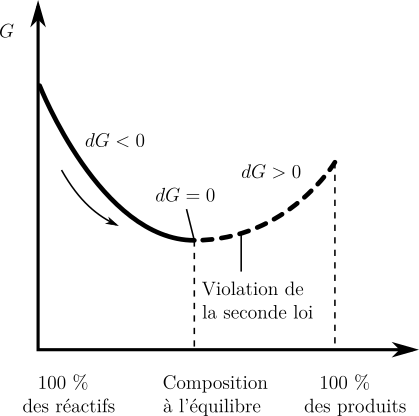

In [3]:
SVG(filename="SVG/graph_G_equi.svg")

Pour calculer la composition d'un mélange à une température et une pression donnée, on utilise l'enthalpie libre de Gibbs $G$. 
Elle diminue au cours de transformation d'un système réactif. 
La variation de l'enthalpie libre $\Delta G_T^o$, nous indique donc si une réaction peut avoir lieu.
Trois cas sont possibles (voir figure ci-dessus):

* $\Delta G_T^o$ < 0 implique que la réaction doit avoir lieu. 
* $\Delta G_T^o$ = 0 implique que le système est à l'équilibre.  
* $\Delta G_T^o$ > 0 implique que la réaction ne peut pas avoir lieu. 

Ces trois cas proviennent directement de l'analyse de la seconde loi de la thermodynamique.
Pour notre problème, le second principe peut s'exprimer de la manière suivante:

\begin{equation}
(\mathrm{d}G)_{T,P,m} \leq 0,
\end{equation}

Appliquons maintenant cette loi à un mélange de gaz parfait.
Pour ce type de mélange, la fonction de Gibbs de la $i^{\text{eme}}$ espèce chimique est donnée par: 

\begin{equation}
\overline{g}_{i,T} =  \overline{g}^o_{i,T} + R_u T \ln (P_i/P^o)
\end{equation}

où $\overline{g}^o_{i,T}$ est la fonction de Gibbs pour une espèce pure à la pression standard ($P_i = P^o$) et $P_i$ la pression partielle.

Dans le cas de système réactif, la "fonction énergie de formation de Gibbs" $\overline{g}^o_{f,i}$ est fréquemment employée. 
De nombreuses bases de données thermodynamiques sont construites autour  de cette fonction. 
Par exemple, les polynômes pour un grand nombre d’espèces peuvent être trouvés dans le rapport intitulé "Nasa Glenn Coefficient for Calculating Thermodynamic Proprietes of Individual Specie" <html>(Gordon &#38; McBride, 2002)</html>.  
Regardons maintenant comment cette fonction est définie:

\begin{equation}
\overline{g}^o_{f,i} (T) =  \overline{g}^o_{i} (T) - \sum_{\text{j élements}} \nu^{'}_j \overline{g}^o_{j} (T)
\end{equation}

avec $\nu^{'}_j$ le coefficient stœchiométrique pour l'élément considéré nécessaire à la formation d'une mole du composé qui nous intéresse. 
Par exemple, les coefficients sont $\nu^{'}_{\mathrm{O_2}} = \frac{1}{2}$ et $\nu^{'}_{\mathrm{C}} = 1$ pour former une mole de CO à partir de C et O$_2$, respectivement. 
Comme pour l'enthalpie, la fonction énergie de formation de Gibbs d'un élément d'origine naturelle est fixée à zéro pour son état de référence.
En utilisant les tables thermodynamiques précédemment citées, il est possible de calculer la variation $\overline{g}^o_{i,T}$ entre différentes espèces à la même température.

Regardons maintenant le cas d'un mélange de gaz parfaits et exprimons l'enthalpie libre du mélange:

\begin{equation}
G_{\text{mix}} = \sum N_i \, \overline{g}^o_{i,T} = \sum N_i \left[ \overline{g}^o_{i,T}  + R_u T \ln (P_i/P^o) \right]
\end{equation}

avec $N_i$ le nombre de moles de la $i^{\text{eme}}$ espèce.

Pour une condition fixe de température et de pression, la condition d'équilibre devient:

\begin{equation}
\mathrm{d} G_{\text{mix}} = 0
\end{equation}

que l'on peut aussi exprimer sous la forme suivante:

\begin{equation}
\sum \mathrm{d} N_i \cdot \left[ \overline{g}^o_{i,T} +  R_u T \ln (P_i/P^o) \right] + \sum  N_i \cdot \mathrm{d} \left[ \overline{g}^o_{i,T} +  R_u T \ln (P_i/P^o) \right] = 0
\label{eq_gibbs_gaz_parfait}
\end{equation}

Le deuxième terme de l'équation \eqref{eq_gibbs_gaz_parfait} vaut zéro. 
Pour arriver à cette conclusion, il faut remarquer deux choses.
Premièrement que $\mathrm{d}(\ln P_i) = \mathrm{d} P_i / P_i$, et deuxièmement que la pression totale reste constante, et cela quelque soit la variation des pressions partielles. 
Formellement cette équation s'écrit $\sum \mathrm{d}P_i = 0$. 
Cela conduit à la nullité du second terme de l'équation \eqref{eq_gibbs_gaz_parfait}.
Finalement à l’équilibre nous avons:

\begin{equation}
\mathrm{d} G_{\text{mix}} = 0 = \sum \mathrm{d} N_i \left[ \overline{g}^o_{i,T} +  R_u T \ln (P_i/P^o) \right]
\label{eq_gibbs_mix_gaz_parfait}
\end{equation}

Dans le cas général de la réaction suivante:

\begin{equation}
a A + b B + \cdots \rightleftharpoons e E + f F + \cdots
\label{eq_chimie_gaz_parfait_gibbs}
\end{equation}

le nombre de moles transformées pour chaque espèce est directement proportionnel aux coefficients stœchiométriques:

<style>
    .data-table {
        border-collapse: collapse;
    }
    .align-center {
        text-align: center;
    }
</style>

<table class="data-table">
    <tr>
        <th class="align-center">d$N_{\mathrm{A}}$</th>
        <th class="align-center">=</th>
        <th class="align-center">$-\mathcal{K}a$</th>
    </tr>
    <tr>
        <td class="align-center">d$N_{\mathrm{B}}$</td>
        <td class="align-center">=</td>
        <td class="align-center">$-\mathcal{K}b$</td>
    </tr>
    <tr>
        <td class="align-center">$\vdots$</td>
        <td class="align-center"></td>
        <td class="align-center">$\vdots$</td>
    </tr>
    <tr>
        <td class="align-center">d$N_{\mathrm{E}}$</td>
        <td class="align-center">=</td>
        <td class="align-center">$+\mathcal{K}e$</td>
    </tr>
    <tr>
        <td class="align-center">d$N_{\mathrm{F}}$</td>
        <td class="align-center">=</td>
        <td class="align-center">$+\mathcal{K}f$</td>
    </tr>
    <tr>
        <td class="align-center">$\vdots$</td>
        <td class="align-center"></td>
        <td class="align-center">$\vdots$</td>
    </tr>
</table>

En remplaçant les équations précédentes dans l'équation \eqref{eq_gibbs_mix_gaz_parfait} et en supprimant la constante de proportionnalité $\mathcal{K}$ nous obtenons:

\begin{multline}
-a \left[ \overline{g}^o_{A,T} +  R_u T \ln (P_A/P^o) \right] - b \left[ \overline{g}^o_{B,T} +  R_u T \ln (P_B/P^o) \right] - \cdots \\
 + e \left[ \overline{g}^o_{E,T} +  R_u T \ln (P_E/P^o) \right] + f \left[ \overline{g}^o_{F,T} +  R_u T \ln (P_F/P^o) \right] + \cdots = 0
 \label{eq_decompo_gibbs_gaz_parfait}
\end{multline}

L'équation \eqref{eq_decompo_gibbs_gaz_parfait} peut aussi s'écrire de la manière suivante:

\begin{multline}
- \left( e \overline{g}^o_{E,T} + f\overline{g}^o_{F,T} + \cdots - a \overline{g}^o_{A,T} - b \overline{g}^o_{B,T} - \cdots \right) \\
= R_u T \ln \frac{\left( P_E/P^o \right)^e \cdot \left( P_F/P^o \right)^f \cdot \text{etc}}{\left( P_A/P^o \right)^a \cdot \left( P_B/P^o \right)^b \cdot \text{etc}}
 \label{eq_decompo_gibbs_gaz_parfait_2}
\end{multline}

Les termes de gauche entre parenthèses de l'équation \eqref{eq_decompo_gibbs_gaz_parfait_2} sont appelés fonction de changement d'état standard de Gibbs $\Delta G_T^o$:

\begin{equation}
\Delta G_T^o = \left( e \overline{g}^o_{E,T} + f\overline{g}^o_{F,T} + \cdots - a \overline{g}^o_{A,T} - b \overline{g}^o_{B,T} - \cdots \right)
\end{equation}

que l'on peut aussi écrire:

\begin{equation}
\Delta G_T^o \equiv \left( e \overline{g}^o_{E} + f\overline{g}^o_{F} + \cdots - a \overline{g}^o_{A} - b \overline{g}^o_{B} - \cdots \right)_T
\end{equation}

L'argument de la fonction logarithme népérien est défini comme la constante d'équilibre du système $K_p$ pour la réaction de l'équation \eqref{eq_chimie_gaz_parfait_gibbs} et s'exprime de la façon suivante:

\begin{equation}
K_p = \frac{\left( P_E/P^o \right)^e \cdot \left( P_F/P^o \right)^f \cdot \text{etc}}{\left( P_A/P^o \right)^a \cdot \left( P_B/P^o \right)^b \cdot \text{etc}}
\label{eq_definition_Kp}
\end{equation}

Avec ces définitions, l'équation \eqref{eq_decompo_gibbs_gaz_parfait_2} de l'état chimique à l'équilibre est donnée par:

\begin{equation}
\Delta G_T^o = - R_u T \ln K_p
\end{equation}

ou

\begin{equation}
K_p = \exp \left(- \Delta G_T^o / R_u T  \right)
\label{eq_gibbs_exp}
\end{equation}

En partant de la définition de $K_p$ et en regardant de plus près sa relation avec $\Delta G_T^o$, il est possible d'obtenir des informations qualitatives sur la réaction et notamment savoir si elle favorise les produits ou les réactifs à l'équilibre. Si $\Delta G_T^o$ est positif, les réactifs seront favorisés tant que $\ln K_p$ reste négatif, ce qui implique que $K_p$ lui-même doit être inférieur à l'unité. De façon similaire, si $\Delta G_T^o$ est négatif, la réaction tend à favoriser les produits. 

On peut approcher le comportement physique en revenant à la définition en termes de variation d'enthalpie et d'entropie associée à la réaction et, en partant de $G = H-TS$, il est possible d'écrire $\Delta G$ à pression et température constante:

\begin{equation}
\Delta G_T^o = \Delta H^o - T \Delta S^o
\end{equation}

que l'on peut remplacer dans l'équation \eqref{eq_gibbs_exp}.

\begin{equation}
K_p = e^{- \Delta H^o/R_u T} \cdot e^{\Delta S^o/R_u}
\end{equation}

Dérivant cette équation en fonction de $T$ on retrouve la loi de van't Hoff. 
Cette loi indique qu'une augmentation de la température sur un système fermé en équilibre tend à faire évoluer une réaction endothermique dans le sens direct et une réaction exothermique dans le sens inverse. 

## Construction d'un dictionnaire avec les coefficients pour le calcul des variables thermodynamiques.

Avant d'aller plus loin, il faut importer les coefficients des polynômes pour les espèces qui nous intéressent à partir de <html>(Gordon &#38; McBride, 2002)</html>. 
Ces polynômes permettent d'évaluer numériquement, en fonction de la température, différentes variables thermodynamiques, notamment l'énergie libre de Gibbs que nous avons utilisé précédemment, pour un grand nombre d'espèces gazeuses. 

Chaque ligne représente un domaine de température (K) et chaque colonne un coefficient.

Il nous faut également les équations associées à ces coefficients qui se trouvent également dans <html>(Gordon &#38; McBride, 2002)</html>.

\begin{equation}
\overline{h}^o (T) / R_uT = -a_1 T^{-2} + a_2 \ln (T) / T + a_3 + a_4 T / 2 + a_5 T^2 / 3 + a_6 T^3 / 4 + a_7 T^4 / 5 + b_1 T^{-1}
\label{eq_poly_h}
\end{equation}

\begin{equation}
\overline{s}^o (T) / R_u = -a_1 T^{-2} - a_2 T^{-1} + a_3 \ln (T) + a_4 T + a_5 T^2 / 2 + a_6 T^3 / 3 + a_7 T^4 / 4 + b_2
\label{eq_poly_s}
\end{equation}

\begin{equation}
\overline{g}^o (T) / R_uT = \overline{h}^o (T) / R_uT - \overline{s}^o (T) / R_u
\label{eq_poly_gibbs}
\end{equation}

Pour le carbone solide C(s).

In [4]:
import numpy as np
import pandas as pd

index_T_200_600_2000 = [[200,600], [600,2000]]
index_coef = ["a1","a2","a3","a4","a5","a6","a7","b1","b2"]
df_C = pd.DataFrame([[1.132856760E+05, -1.980421677E+03, 1.365384188E+01, -4.636096440E-02, 1.021333011E-04, -1.082893179E-07, 4.472258860E-11, 8.943859760E+03, -7.295824740E+01], 
                  [3.356004410E+05, -2.596528368E+03, 6.948841910E+00, -3.484836090E-03, 1.844192445E-06, -5.055205960E-10, 5.750639010E-14, 1.398412456E+04, -4.477183040E+01]], 
                  index=index_T_200_600_2000, 
                  columns=index_coef)
display(df_C)

,,a1,a2,a3,a4,a5,a6,a7,b1,b2
200,600,113285.676,-1980.421677,13.653842,-0.046361,0.000102,-1.082893e-07,4.472259e-11,8943.85976,-72.958247
600,2000,335600.441,-2596.528368,6.948842,-0.003485,0.000002,-5.055206e-10,5.750639e-14,13984.12456,-44.771830


Pour la vapeur d'eau H$_2$O.

In [5]:
index_T_200_1000_5000 = [[200,1000], [1000,5000]]
df_H2O = pd.DataFrame([[-3.947960830E+04, 5.755731020E+02, 9.317826530E-01, 7.222712860E-03, -7.342557370E-06, 4.955043490E-09, -1.336933246E-12, -3.303974310E+04, 1.724205775E+01],
                [1.034972096E+06, -2.412698562E+03, 4.646110780E+00, 2.291998307E-03, -6.836830480E-07, 9.426468930E-11, -4.822380530E-15, -1.384286509E+04, -7.978148510E+00]], 
                  index=index_T_200_1000_5000, 
                  columns=index_coef)
df_H2O

,,a1,a2,a3,a4,a5,a6,a7,b1,b2
200,1000,-3.947961e+04,575.573102,0.931783,0.007223,-7.342557e-06,4.955043e-09,-1.336933e-12,-33039.74310,17.242058
1000,5000,1.034972e+06,-2412.698562,4.646111,0.002292,-6.836830e-07,9.426469e-11,-4.822381e-15,-13842.86509,-7.978149


Pour les autres espèces.

In [6]:
df_CO = pd.DataFrame([[1.489045326E+04, -2.922285939E+02, 5.724527170E+00, -8.176235030E-03, 1.456903469E-05, -1.087746302E-08, 3.027941827E-12, -1.303131878E+04, -7.859241350E+00],
                    [4.619197250E+05, -1.944704863E+03, 5.916714180E+00, -5.664282830E-04, 1.398814540E-07, -1.787680361E-11, 9.620935570E-16, -2.466261084E+03, -1.387413108E+01]], 
                  index=index_T_200_1000_5000, 
                  columns=index_coef)

df_H2 = pd.DataFrame([[4.078323210E+04, -8.009186040E+02, 8.214702010E+00, -1.269714457E-02, 1.753605076E-05, -1.202860270E-08, 3.368093490E-12, 2.682484665E+03, -3.043788844E+01],
                    [5.608128010E+05, -8.371504740E+02, 2.975364532E+00, 1.252249124E-03, -3.740716190E-07, 5.936625200E-11, -3.606994100E-15, 5.339824410E+03, -2.202774769E+00]], 
                  index=index_T_200_1000_5000, 
                  columns=index_coef)

df_CH4 = pd.DataFrame([[-1.766850998e+05, 2.786181020e+03, -1.202577850e+01, 3.917619290e-02, -3.619054430e-05, 2.026853043e-08, -4.976705490e-12, -2.331314360e+04, 8.904322750e+01],
                    [3.730042760e+06, -1.383501485e+04, 2.049107091e+01, -1.961974759e-03, 4.727313040e-07, -3.728814690e-11, 1.623737207e-15, 7.532066910e+04, -1.219124889e+02]], 
                  index=index_T_200_1000_5000, 
                  columns=index_coef)

df_CO2 = pd.DataFrame([[4.943650540e+04, -6.264116010e+02, 5.301725240e+00, 2.503813816e-03,-2.127308728e-07, -7.689988780e-10, 2.849677801e-13, -4.528198460e+04,-7.048279440e+00],
                    [1.176962419e+05, -1.788791477e+03, 8.291523190e+00,-9.223156780e-05, 4.863676880e-09, -1.891053312e-12, 6.330036590e-16, -3.908350590e+04,-2.652669281e+01]], 
                  index=index_T_200_1000_5000, 
                  columns=index_coef)

On construit un dictionnaire ou l'on range les tableaux.

In [7]:
dict_NASA = {'H2': df_H2, 'CO': df_CO, 'C(s)': df_C, 'H2O': df_H2O, 'CH4': df_CH4, 'CO2': df_CO2}

On construit une fonction qui renvoie la matrice des coefficients en fonction de l'éspece et de la température. 

In [8]:
def NASA_9_vec(T,Espece,dico=dict_NASA):
    df = dico[Espece]
    T0 = df.index[0]
    T1 = df.index[1]
    NASA_9 = np.zeros((T.shape[0],9))
    index_0 = (T>=T0[0]) & (T<=T0[1])
    index_1 = (T>=T1[0]) & (T<=T1[1])
    NASA_9[index_0] = df.xs(T0).values
    NASA_9[index_1] = df.xs(T1).values
    return NASA_9

Enfin on construit la fonction qui calcul les variables thermodynamique suivant les équations \eqref{eq_poly_h}, \eqref{eq_poly_s} et \eqref{eq_poly_gibbs}

In [9]:
#Revoie H/RT S/R et G/RT en fonction des coefficients et de la température. 
def NASA_poly(T, NASA_9):
    H_RT = np.zeros_like(T)
    S_R = np.zeros_like(T)
    G_RT = np.zeros_like(T)
    H_RT = -NASA_9[:,0]*np.power(T,-2) + NASA_9[:,1]*np.log(T)/T + NASA_9[:,2] + NASA_9[:,3]*T/2. + NASA_9[:,4]*np.power(T,2)/3. + NASA_9[:,5]*np.power(T,3)/4. + NASA_9[:,6]*np.power(T,4)/5. + NASA_9[:,7]/T
    S_R = -NASA_9[:,0]*np.power(T,-2)/2. - NASA_9[:,1]*np.power(T,-1) + NASA_9[:,2]*np.log(T) + NASA_9[:,3]*T + NASA_9[:,4]*np.power(T,2)/2. + NASA_9[:,5]*np.power(T,3)/3. + NASA_9[:,6]*np.power(T,4)/4. + NASA_9[:,8]
    G_RT = H_RT - S_R
    return H_RT, S_R, G_RT

#Revoie G/RT en fonction de la température et de l'éspéce.
def NASA_G0_RT(T,Espece):
    return NASA_poly(T, NASA_9_vec(T,Espece))[2]

Nous avons maintenant tout le materiel necessaire pour faire notre premier calcul de la composition d'une réaction chimique à l'équilibre thermodynamique. 

## Construction du système pour une réaction

Pour illustrer la construction d'un système à l’équilibre thermodynamique nous allons 
considérer la dissociation de la vapeur d'eau avec le carbone comme réactif:
\begin{equation}
\mathrm{C(s) + H_2O \rightleftharpoons CO + H_2}
\label{reaction_simple_gaz} 
\end{equation}

Dans cette équation, nous reconnaissons trois éléments sous forme gazeuse et un élément sous forme solide. 
Regardons tout d'abord la composition du gaz. 
Pour trouver les trois fractions molaires inconnues $\chi_\mathrm{H_2O}$, $\chi_\mathrm{CO}$ et $\chi_\mathrm{H_2}$, nous avons besoin de trois équations.
La première sera l'équilibre des pressions et pour laquelle les équations \eqref{eq_definition_Kp} et \eqref{eq_gibbs_exp} seront nécessaires.
Les deux autres équations proviendront de la conservation des éléments, qui postule que le nombre total de C, H et O est constant, indépendamment de leurs distributions à travers les quatre espèces.

Pour utiliser l'équation \eqref{eq_gibbs_exp}, nous identifions les coefficients stœchiométriques $a=1$, $b=1$, $c=1$ et $d=1$

\begin{equation}
\mathrm{(1)C(s) + (1)H_2O \rightleftharpoons (1)CO + (1)H_2}
\end{equation}

Nous pouvons maintenant évaluer la variation de l’énergie libre de Gibbs pour la réaction precedente. 

A 800 K par exemple:

\begin{align}
\Delta G_T^o =& \left[ (1) \overline{g}^o_{f,\mathrm{H_2}} + (1) \overline{g}^o_{f,\mathrm{CO}} - (1) \overline{g}^o_{f,\mathrm{H_2O}} - (1) \overline{g}^o_{f,\mathrm{C}} \right]_{T=800 K} \\
=& \left[ -(1)112937 -(1)277182 + (1)402877 + (1)8219 \right] \\
=& 20976 \text{kJ kmol}^{-1}
\end{align}

In [10]:
#On fixe le température a 800 K
T = np.array([800.0])

#On calcul le resultat
Delta_G_0 = NASA_G0_RT(T,'H2') + NASA_G0_RT(T,'CO') - NASA_G0_RT(T,'H2O') - NASA_G0_RT(T,'C(s)')

#On recupére G_RT et on multiplie par la constante des gaz parfait R=8.3144621 J mol$^{-1}$ K$^{-1}$ et par T pour avoir $\overline{g}^o$
Delta_G_0 * 8.3144621 * T

array([ 20976.55147226])

On notera que, dans les calculs, les solides et liquides purs sont omis.
En effet, l'activité d'un liquide ou d'un composé pur est égale à 1; de ce fait la valeur de la constante d'équilibre est la même avec ou sans la prise en compte des solides ou liquides purs.
$K_p$ est définie de la manière suivante: 


\begin{equation}
K_p = \frac{\left( P_\mathrm{H_2}/P^o \right)^1 \cdot \left( P_\mathrm{CO}/P^o \right)^1}{\left( P_\mathrm{H_2O}/P^o \right)^1}
\end{equation}

Nous pouvons réécrire $K_p$ en fonction des fractions molaires en utilisant $P_i = \chi_i P$.

\begin{equation}
K_p = \frac{ \chi_\mathrm{H_2} \cdot \chi_\mathrm{CO}}{ \chi_\mathrm{H_2O}} \cdot \left( P / P^o \right)
\end{equation}

En substituant l'expression précédente dans l'équation \eqref{eq_gibbs_exp} nous obtenons: 

\begin{align}
\frac{ \chi_\mathrm{H_2} \cdot \chi_\mathrm{CO} \cdot \left( P / P^o \right) }{ \chi_\mathrm{H_2O}} = & \exp \left[ \dfrac{ - \Delta G_T^o}{R T} \right] \\
= & \exp \left[ \dfrac{- 20976}{8,314 \cdot 800} \right]
\end{align}


\begin{equation}
\frac{ \chi_\mathrm{H_2} \cdot \chi_\mathrm{CO} \cdot \left( P / P^o \right) }{ \chi_\mathrm{H_2O}} = 0,04269
\end{equation}

In [11]:
def KP(T):
    ln_Kp_RT =  (NASA_G0_RT(T,'H2')
                    + NASA_G0_RT(T,'CO')
                    - NASA_G0_RT(T,'H2O')
                    - NASA_G0_RT(T,'C(s)'))
    #Calcul de la constante d'equilibre
    return np.exp(-ln_Kp_RT)

KP(T)

array([ 0.0426971])

Trois nouvelles équations sont nécessaires pour exprimer la conservation des éléments.
Si $N_c$ et $N_g$, sont le nombre de moles de carbone solide et le nombre de moles de gaz respectivement, ces équations s'écrivent: 

\begin{align}
\text{N atomes de carbone} =& N_g \chi_\mathrm{CO} + N_c \\
\text{N atomes d'hydrogène} =& N_g \left( 2 \chi_\mathrm{H_2} + 2\chi_\mathrm{H_2O} \right) \\
\text{N atomes d'oxygène} =& N_g \left( \chi_\mathrm{CO} + \chi_\mathrm{H_2O} \right)
\end{align}

Pour obtenir la dernière équation, écrivons que la somme des fractions molaires est égale à 1:

\begin{equation}
\sum_i \chi_i = 1
\end{equation}

ce qui donne

\begin{equation}
\chi_\mathrm{CO} + \chi_\mathrm{H_2O} + \chi_\mathrm{H_2} = 1
\end{equation}


Comme nous pouvons le voir dans la résolution du problème ci dessous, le système comporte 5 inconnues et 5 équations. 
Pour cet exemple, le système d'équations est linéaire, mais ce n'est pas toujours le cas. 
Dans le cas général, le système est non linéaire et il faut utiliser un solveur itératif pour résoudre le système. 
Ici nous allons utiliser "scipy.optimize.root" pour résoudre le système à différentes températures. 
La fonction "root" permet d'utiliser de nombreux solveur itératif. 

In [21]:
from scipy import optimize

#Domaine de temperature ou l'on résout le systeme.
T_vec = np.linspace(300,1500,100)

#nombre dans le systeme pour la conservation des éléments
N_C = 1.
N_H2O = 1.
N_H = 2. * N_H2O
N_O = N_H2O

#Ce à quoi les variables sont associées
#x[0]: X_H2O
#x[1]: X_H2
#x[2]: X_CO
#x[3]: ng
#x[4]: ns

#Les conditions initiales
x0=np.zeros(5)
x0[0] = 0.3 #X_H2O
x0[1] = 0.3 #X_H2
x0[2] = 0.3 #X_CO
x0[3] = 0.5 #ng
x0[4] = 0.5# ns

#Definition du systeme a resoudre
def syst_equilibre_simple(x, T, N_C, N_H, N_O):
    return [x[0] - x[1]*x[2] / KP(T),         #Equation d'équilibre thermodynamique
            x[3]*x[2] + x[4] - N_C,           #Conservation du carbone
            x[3]*(2*x[1] + 2*x[0]) - N_H,     #Conservation de l'hydrogene
            x[3]*(x[0]+x[2]) - N_O,           #Conservation de l'oxygene
            x[0] + x[1] + x[2] - 1]           #Somme des fractions molaire egale a l'unitée

def Resolution():
    #On construit une matrice pour les resultats
    solution = np.zeros((T_vec.shape[0],5))
    #Pour chaque temperature nous allons résoudre le systeme
    for i in range(T_vec.shape[0]):
        #Pour la premiere resolution les conditions initiales sont estimées
        if i == 0:
            solution[i,:] = optimize.root(syst_equilibre_simple, x0, args=(np.array([T_vec[i]]),N_C,N_H,N_O), method='hybr', tol=1e-10).x
        #Pour les autres on utilise les resultats du calcul precedent comme conditions initiales
        else:
            solution[i,:] = optimize.root(syst_equilibre_simple, solution[i-1,:], args=(np.array([T_vec[i]]),N_C,N_H,N_O), method='hybr', tol=1e-10).x
    return solution

solution = Resolution()

Regardons l'évolution de la composition en fonction de la température à la pression atmosphérique soit 1e5 Pa.

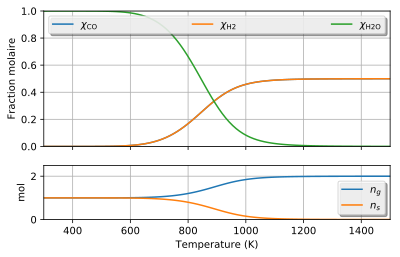

In [22]:
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import warnings

%matplotlib inline
% config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", module="matplotlib")

#Les proportions pour avoir de zoli graph
nombre_dor = (np.sqrt(5)-1.0)/2.0
largeur_fig = 1.3*4.7747
hauteur_fig = largeur_fig*nombre_dor
fig_size =  [largeur_fig,hauteur_fig]
fig_size_2 =  [largeur_fig/2,hauteur_fig]


plt.figure(figsize=fig_size)
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(T_vec, solution[:,2], label=r"$\chi_\mathrm{CO}$")
ax0.plot(T_vec, solution[:,1], label=r"$\chi_\mathrm{H2}$")
ax0.plot(T_vec, solution[:,0], label=r"$\chi_\mathrm{H2O}$")
ax0.set_ylabel('Fraction molaire')
ax0.legend(loc='best', shadow=True, ncol=3, mode="expand", fontsize="medium")
ax0.grid(True)
ax0.set_ylim(0,1)
plt.setp(ax0.get_xticklabels(), visible=False)
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.plot(T_vec, solution[:,3], label=r"$n_g$")
ax1.plot(T_vec, solution[:,4], label=r"$n_s$")
ax1.set_ylabel('mol')
ax1.legend(loc='best', shadow=True, fontsize="medium")
ax1.grid(True)
ax1.set_ylim(0,2.5)
plt.xlim(min(T_vec), max(T_vec))
plt.xlabel('Temperature (K)')

L'équilibre de la réaction \eqref{reaction_simple_gaz} nous montre qu'elle "s'active" à partir de 600K et que tout les réactifs sont consommés au environ de 1100K. 
Pour maximiser la production de H$_2$ il faut donc au minimum atteindre 1100K. 

Notons que l'on peut également travailler sur les concentrations grâce à la relation:

\begin{equation}
K_p = K_c \left( R T / P^o \right)^{\Delta \nu}
\end{equation}

avec dans ce cas particulier:

\begin{equation}
K_c = \dfrac{\left[\mathrm{CO} \right] \left[ \mathrm{H_2}\right]}{\left[ \mathrm{H_2O} \right]}
\end{equation}

## Construction du système pour de multiples réactions

Dans la section précédente, nous avons analysé une situation simple impliquant l'équilibre d'une seule réaction. 
Mais dans la plupart des systèmes réactifs, beaucoup d'espèces sont mises en jeu et de nombreux équilibres doivent être calculés. 
Nous allons étendre l'exemple précédent en rajoutant la réaction $\mathrm{CO + H_2O \rightleftharpoons CO_2 + H_2}$ qui fait partie du système réactionnel classiquement utilisé pour modéliser la réduction du charbon. 
Le fait de rajouter cette réaction conduit simplement à ajouter une inconnue $\chi_{\mathrm{CO_2}}$ et une équation supplémentaire pour tenir compte de la nouvelle réaction.

\begin{equation}
K_p \prime = \dfrac{\chi_\mathrm{H_2} \chi_\mathrm{CO_2}}{\chi_\mathrm{CO} \chi_\mathrm{H_2O}}
\end{equation}

Avec $K_p \prime$ la constante d’équilibre à la température considérée pour la réaction:

\begin{equation}
\mathrm{CO + H_2O \rightleftharpoons CO_2 + H_2}
\end{equation}

## Modèle réduit de la zone de réduction pour la gazeification du charbon.

Un gazeifieur downdraft est représenté ci-dessous (extrait de <html>(Basu, 2010)</html>)avec le profil de température et les différentes zones de réaction typique pour ce type réacteur. 
Dans cet article nous nous intéresserons uniquement à la zone de réduction qui est la dernière étape après le s’échange la pyrolyse et l'oxydation partielles. 
Cette approche est possible à condition que tous les gaz produits de manière significative soient pris en compte dans les équations stœchiométriques considérées dans la modélisation de la zone de réduction, qu'il n'y est pas de réaction irréversible dans le sens de la variation de température qui nous intéresse et que le réacteur soit à haute température où qu'il y ai des catalyseurs de manière à ce que les temps caractéristiques des cinétiques de réaction soient négligeable vis-à-vis des temps caractéristiques des autres phénomènes considérés dans le réacteur. 

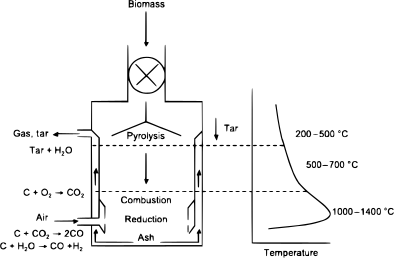

In [14]:
SVG(filename="SVG/reac_downdraft.svg")

La zone de réduction est en général décrite à l'aide de 4 réactions globales (équations \eqref{reaction_boudouard_wang}, \eqref{reaction_water_gaz_wang}, \eqref{reaction_methanation_wang} et \eqref{reaction_steam_reforming_wang}).
Les données thermodynamiques pour les charbons n'étant pas disponibles, les données du graphite ont été utilisées pour calculer la constante d'équilibre (équations \eqref{eq_kp_r1}, \eqref{eq_kp_r2}, \eqref{eq_kp_r3} et \eqref{eq_kp_r4}).

\begin{align}
\mathrm{C_{solid} + CO_2} & \rightleftharpoons \mathrm{2 CO} & +172 \text{ Mj kmol}^{-1} \label{reaction_boudouard_wang} 
\\
\mathrm{C_{solid} + H_2O} & \rightleftharpoons  \mathrm{CO + H_2} & +131\text{ Mj kmol}^{-1} \label{reaction_water_gaz_wang} 
\\
\mathrm{C_{solid} + 2 H_2} & \rightleftharpoons  \mathrm{CH_4} & -75\text{ Mj kmol}^{-1} \label{reaction_methanation_wang} 
\\
\mathrm{CH_4 + H_2O} & \rightleftharpoons  \mathrm{CO + 3 H_2} & +206\text{ Mj kmol}^{-1} \label{reaction_steam_reforming_wang} 
\end{align}

Il nous faut maintenant calculer la constante d’équilibre de chacune de ces réactions.
Considérons une équation stœchiométrique de la forme:  

\begin{equation}
a \text{A} + b \text{B} + \cdots \rightleftharpoons e \text{E} + f \text{F} + \cdots
\end{equation}

Comme nous l'avons vu dans la partie précédente, la constante d’équilibre se calcule de la manière suivante:

\begin{align}
K_p = \exp & \left[- \left( \dfrac{\Delta G^o_T}{R_u T} \right) \right] 
\\
	= \exp & \left[- \left( e\dfrac{\overline{g}^o_{\text{E},T}}{R_u T} + f \dfrac{\overline{g}^o_{\text{F},T}}{R_u T} + \cdots  \right. \right.
\left. \left. -  a \dfrac{\overline{g}^o_{\text{A},T}}{R_u T} -  b \dfrac{\overline{g}^o_{\text{B},T}}{R_u T} - \cdots \right) \right]
\end{align}

Les constantes d'équilibre pour les réactions \eqref{reaction_boudouard_wang} à \eqref{reaction_steam_reforming_wang} sont fixées par les équations \eqref{eq_kp_r1} à \eqref{eq_kp_r4} ci-dessous, respectivement.

\begin{equation}
K_{p,\text{R1}} = \exp \left[- \left( 2\dfrac{\overline{g}^o_{\mathrm{CO},T}}{R_u T} -  \dfrac{\overline{g}^o_{\mathrm{CO_2},T}}{R_u T} \right. \right.
 - \left. \left. \dfrac{\overline{g}^o_{\mathrm{C_{solid}},T}}{R_u T} \right) \right]
 \label{eq_kp_r1}
\end{equation}

\begin{equation}
K_{p,\text{R2}} = \exp  \left[- \left( \dfrac{\overline{g}^o_{\mathrm{H_2},T}}{R_u T} + \dfrac{\overline{g}^o_{\mathrm{CO},T}}{R_u T} \right. \right.
 -  \left. \left. \dfrac{\overline{g}^o_{\mathrm{H_2O},T}}{R_u T} -  \dfrac{\overline{g}^o_{\mathrm{C_{solid}},T}}{R_u T} \right) \right]
 \label{eq_kp_r2}
\end{equation}

\begin{equation}
K_{p,\text{R3}} = \exp \left[- \left( \dfrac{\overline{g}^o_{\mathrm{CH_4},T}}{R_u T}
-  2\dfrac{\overline{g}^o_{\mathrm{H_2},T}}{R_u T} \right. \right.
-  \left. \left. \dfrac{\overline{g}^o_{\mathrm{C_{solid}},T}}{R_u T} \right) \right]
\label{eq_kp_r3}
\end{equation}

\begin{equation}
K_{p,\text{R4}} = \exp \left[- \left( \dfrac{\overline{g}^o_{\mathrm{CO},T}}{R_u T} + 3\dfrac{\overline{g}^o_{\mathrm{H_2},T}}{R_u T}  \right. \right.
-  \left. \left. \dfrac{\overline{g}^o_{\mathrm{CH_4},T}}{R_u T} - \dfrac{\overline{g}^o_{\mathrm{H_2O},T}}{R_u T} \right) \right]
\label{eq_kp_r4}
\end{equation}


On construit une fonction qui fera le calcul en fonction des espèces et des coefficients de l'équation stochéometrique:

In [15]:
def Calcul_KP_reac(T, Espece, Coefficient):
    if len(Espece) != len(Coefficient):
        raise ValueError("Il n'y a pas autant de coefficients que d'espéces")
    DeltaG = 0.
    for i in range(len(Espece)):
        DeltaG += Coefficient[i]*NASA_poly(T, NASA_9_vec(T,Espece[i]))[2]
    return np.exp(-DeltaG)

Nous faisons le calcul pour le problème résolu précédemment et l'on vérifie qu'il revoie la même valeur.

In [16]:
T = np.array([800.])
Calcul_KP_reac(T, ["H2","CO","H2O","C(s)"], [1,1,-1,-1]), Calcul_KP_reac(T, ["H2","CO","H2O","C(s)"], [1,1,-1,-1]) == KP(T)

(array([ 0.0426971]), array([ True], dtype=bool))

La fonction de Gibbs $\overline{g}^o_{i,T}/{R_u T}$ doit être calculée à l'aide de l'équation \eqref{eq_poly_gibbs}. 
Puisqu’il n'y a pas de données disponibles pour la biomasse, la constante d'équilibre est calculée en supposant que la biomasse se comporte comme du carbone pur. 

Nous pouvons maintenant écrire les relations entre les fractions molaires à l’équilibre. 
Seules les espèces présentes dans la phase gazeuse doivent être prises en compte dans le calcul à l’équilibre puisque c'est l'équilibre de la phase gazeuse. 

En reprenant l'équation \eqref{eq_definition_Kp} la forme générale est:

\begin{equation}
K_p = \dfrac{\left( P_E/P^o \right)^e \left( P_F/P^o \right)^f \cdots}{\left( P_A/P^o \right)^a \left( P_B/P^o \right)^b \cdots}
= \dfrac{\chi_E^e \chi_F^f \cdots}{\chi_A^a \chi_B^b \cdots} \left( P / P^o \right)^{\Delta \nu}
\end{equation}

Pour les équations \eqref{reaction_boudouard_wang} à \eqref{reaction_steam_reforming_wang}, nous avons:

\begin{equation}
\chi_\mathrm{CO_2,eq} = \dfrac{\chi_\mathrm{CO,eq}^2}{K_{p,\text{R1}}} \left( P / P^o \right)
\label{eq_eq_R1}
\end{equation}

\begin{equation}
\chi_\mathrm{H_2O,eq} = \dfrac{\chi_\mathrm{CO,eq} \chi_\mathrm{H_2,eq}}{K_{p,\text{R2}}} \left( P / P^o \right)
\label{eq_eq_R2}
\end{equation}

\begin{equation}
\chi_\mathrm{H_2,eq}^2 = \dfrac{\chi_\mathrm{CH_4,eq}}{K_{p,\text{R3}}} \left( P / P^o \right)^{-1}
\label{eq_eq_R3}
\end{equation}

\begin{equation}
\chi_\mathrm{H_2O,eq} \chi_\mathrm{CH_4,eq} = \dfrac{\chi_\mathrm{CO,eq} \chi_\mathrm{H_2,eq}^3}{K_{p,\text{R4}}} \left( P / P^o \right)^2
\label{eq_eq_R4}
\end{equation}

La conservation des éléments pour les équations \eqref{reaction_boudouard_wang} à \eqref{reaction_steam_reforming_wang} s'écrit de la manière suivante:

\begin{align}
N_\text{C} & = N_g \left( \chi_\text{CO} + \chi_\text{CO$_2$} + \chi_\text{CH$_4$} \right) + N_\text{coal} \label{C_balance}
\\
N_\text{H} & = N_g \left( 2 \chi_\text{H$_2$} + 2 \chi_\text{H$_2$O} + 4 \chi_\text{CH$_4$} \right) \label{H_balance}
\\
N_\text{O} & = N_g \left( \chi_\text{CO} + 2 \chi_\text{CO$_2$} +  \chi_\text{H$_2$O} \right) \label{O_balance}
\end{align}

Finalement, il ne nous reste plus qu'à écrire que la somme des fractions molaires est égale à l'unité.

\begin{equation}
\sum_{i \in \text{gas}} \chi_i = \chi_\text{CO} + \chi_\text{CO$_2$} + \chi_\text{CH$_4$} + \chi_\text{H$_2$} = 1
\label{Molar_Frac_Unity}
\end{equation}

Regardons l'évolution de la composition en fonction de la température à la pression atmosphérique soit 1e5 Pa.

In [17]:
#Domaine de temperature ou l'on résout le systeme.
T_vec = np.linspace(300,1500,100)

#nombre dans le systeme pour la conservation des éléments
N_C = 1.
N_H2O = 1.
N_H = 2. * N_H2O
N_O = N_H2O
P = 1.0e5

#Les conditions initiales
x0=np.zeros(7)
x0[0] = 0.85 #X_H2O
x0[1] = 0.0 #X_CO
x0[2] = 0.0 #X_H2
x0[3] = 0.07 #X_CO2
x0[4] = 0.07 #X_CH4
x0[5] = 1.0 #n_gaz
x0[6] = 1.0 #n_solide


#Definition du systeme a resoudre
def syst_equilibre_maximal(x, T, N_C, N_H, N_O, P):
    P0 = 1.0e5
    return [x[0] - x[1]*x[2] / Calcul_KP_reac(T, ["H2","CO","H2O","C(s)"], [1,1,-1,-1])[0] * (P/P0),
            x[3] - x[1]**2 / Calcul_KP_reac(T, ["CO","CO2","C(s)"], [2,-1,-1])[0] * (P/P0),
            #x[2]**2 - x[4] / Calcul_KP_reac(T, ["CH4","H2","C(s)"], [1,-2,-1])[0] * (P/P0)**(-1),
            x[0]*x[4] - x[1]*x[2]**3 / Calcul_KP_reac(T, ["CO","H2","CH4","H2O"], [1,3,-1,-1])[0] * (P/P0)**2, 
            x[5]*(x[1] + x[3] + x[4]) + x[6] - N_C,  
            x[5]*(2*x[2] + 2*x[0] + 4*x[4]) - N_H, 
            x[5]*(x[1]+ 2*x[3] + x[0]) - N_O,        
            x[0] + x[1] + x[2] + x[3] + x[4] - 1]      

def Resolution():
    #On construit une matrice pour les resultats
    solution = np.zeros((T_vec.shape[0],7))
    #Pour chaque temperature nous allons résoudre le systeme
    for i in range(T_vec.shape[0]):
        #Pour la premiere resolution les conditions initiales sont estimées
        if i == 0:
            solution[i,:] = optimize.root(syst_equilibre_maximal, x0, args=(np.array([T_vec[i]]),N_C,N_H,N_O,P), method='hybr', tol=1e-10).x
        #Pour les autres on utilise les resultats du calcul precedent comme conditions initiales
        else:
            solution[i,:] = optimize.root(syst_equilibre_maximal, solution[i-1,:], args=(np.array([T_vec[i]]),N_C,N_H,N_O,P), method='hybr', tol=1e-10).x
    return solution

solution = Resolution()

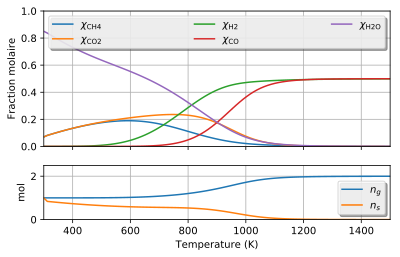

In [18]:
plt.figure(figsize=fig_size)
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(T_vec, solution[:,4], label=r"$\chi_\mathrm{CH4}$")
ax0.plot(T_vec, solution[:,3], label=r"$\chi_\mathrm{CO2}$")
ax0.plot(T_vec, solution[:,2], label=r"$\chi_\mathrm{H2}$")
ax0.plot(T_vec, solution[:,1], label=r"$\chi_\mathrm{CO}$")
ax0.plot(T_vec, solution[:,0], label=r"$\chi_\mathrm{H2O}$")
ax0.set_ylabel('Fraction molaire')
ax0.legend(loc='best', shadow=True, ncol=3, mode="expand", fontsize="medium")
ax0.grid(True)
ax0.set_ylim(0,1)
plt.setp(ax0.get_xticklabels(), visible=False)
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.plot(T_vec, solution[:,5], label=r"$n_g$")
ax1.plot(T_vec, solution[:,6], label=r"$n_s$")
ax1.set_ylabel('mol')
ax1.legend(loc='best', shadow=True, fontsize="medium")
ax1.grid(True)
ax1.set_ylim(0,2.5)
plt.xlim(min(T_vec), max(T_vec))
plt.xlabel('Temperature (K)')

Regardons l'évolution de la composition en fonction de la pression à 900K.

In [23]:
#Domaine de temperature ou l'on résout le systeme.
P_vec = np.linspace(0.01,2e5,300)

#nombre dans le systeme pour la conservation des éléments
N_C = 1.
N_H2O = 1.
N_H = 2. * N_H2O
N_O = N_H2O
P = 1.0e5
T = 900.0

#Les conditions initiales
x0=np.zeros(7)
x0[0] = 0.05 #X_H2O
x0[1] = 0.4 #X_CO
x0[2] = 0.5 #X_H2
x0[3] = 0.05 #X_CO2
x0[4] = 0.05 #X_CH4
x0[5] = 1.0 #n_gaz
x0[6] = 1.0 #n_solide

def Resolution():
    #On construit une matrice pour les resultats
    solution = np.zeros((P_vec.shape[0],7))
    #Pour chaque temperature nous allons résoudre le systeme
    for i in range(P_vec.shape[0]):
        #Pour la premiere resolution les conditions initiales sont estimées
        if i == 0:
            solution[i,:] = optimize.root(syst_equilibre_maximal, x0, args=(np.array([T]),N_C,N_H,N_O,np.array([P_vec[i]])), method='hybr', tol=1e-10).x
        #Pour les autres on utilise les resultats du calcul precedent comme conditions initiales
        else:
            solution[i,:] = optimize.root(syst_equilibre_maximal, solution[i-1,:], args=(np.array([T]),N_C,N_H,N_O,np.array([P_vec[i]])), method='hybr', tol=1e-10).x
    return solution

solution_P_T1000 = Resolution()

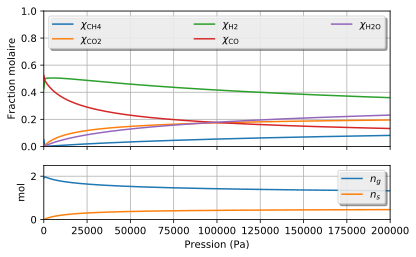

In [24]:
plt.figure(figsize=fig_size)
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(P_vec, solution_P_T1000[:,4], label=r"$\chi_\mathrm{CH4}$")
ax0.plot(P_vec, solution_P_T1000[:,3], label=r"$\chi_\mathrm{CO2}$")
ax0.plot(P_vec, solution_P_T1000[:,2], label=r"$\chi_\mathrm{H2}$")
ax0.plot(P_vec, solution_P_T1000[:,1], label=r"$\chi_\mathrm{CO}$")
ax0.plot(P_vec, solution_P_T1000[:,0], label=r"$\chi_\mathrm{H2O}$")
ax0.set_ylabel('Fraction molaire')
ax0.legend(loc='best', shadow=True, ncol=3, mode="expand", fontsize="medium")
ax0.grid(True)
ax0.set_ylim(0,1)
plt.setp(ax0.get_xticklabels(), visible=False)
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.plot(P_vec, solution_P_T1000[:,5], label=r"$n_g$")
ax1.plot(P_vec, solution_P_T1000[:,6], label=r"$n_s$")
ax1.set_ylabel('mol')
ax1.legend(loc='best', shadow=True, fontsize="medium")
ax1.grid(True)
ax1.set_ylim(0,2.5)
plt.xlim(min(P_vec), max(P_vec))
plt.xlabel('Pression (Pa)')

### Influence de la température et de la pression sur la compostion de sortie.

L’augmentation de la pression à température constante est facilement prévisible en suivant de principe de Le Chatelier. 
En effet, en suivant ce principe, à température constante, l’augmentation de la pression provoque une diminution du nombre de moles de gaz. 
H$_2$O, CO$_2$ et CH$_4$ sont donc favorisées, c'est ce que nous observons sur la dernière figure. 
En revanche à pression constante, une élévation de température favorise les réactions endothermiques et donc la production de H$_2$ et CO, c'est ce que nous observons sur l'avant-dernière figure. 

Pour maximiser la production de H$_2$ il faut donc maximiser la température et minimiser la pression.
À pression atmosphérique, comme pour la réaction \eqref{reaction_simple_gaz} il faut atteindre au minimum la température de 1100K pour maximiser la production de H$_2$

Lorsque l'on confronte ces calculs à des mesures, on se rend compte qu'en dessous de 900K les résultats des calculs sont éloignés de l'expérience. En effet, ces calculs à l'équilibre ne tiennent pas compte des cinétiques de réactions. Cinétiques qui ne peuvent pas être négligées pour ces réactions en dessous des 900K, ce qui explique ces différences.

# Conclusion

Dans cet article, nous avons construit un code de calcul de l'équilibre thermodynamique à partir des équations fondamentales. 
Nous avons ensuite utilisé ce code pour étudier le cas de la gazéification du charbon à pression et à température constante. 
Cet exemple ne constitue qu'un exemple d'application du code et tout système réactif gazeux peut être approximé avec cette méthode. 
Les méthodes que nous avons vues pour résoudre le système réactif peuvent, elles aussi s'appliquer à tout système non linéaire d'équations couplées.

# Bibliographie

<div class="csl-bib-body" style="line-height: 2; padding-left: 2em; text-indent:-2em;">
  <div class="csl-entry">Gordon, S., &amp; McBride, B. J. (2002). <i>Nasa Glenn Coefficient for calculating Thermodynamic Proprietes of Individual Specie</i>. National Aeronautics and Space Administration. Consulté à l’adresse http://www.grc.nasa.gov/WWW/CEAWeb/TP-1999-208523.pdf</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Nasa%20Glenn%20Coefficient%20for%20calculating%20Thermodynamic%20Proprietes%20of%20Individual%20Specie&amp;rft.publisher=National%20Aeronautics%20and%20Space%20Administration&amp;rft.aufirst=Sanford&amp;rft.aulast=Gordon&amp;rft.au=Sanford%20Gordon&amp;rft.au=Bonnie%20J.%20McBride&amp;rft.date=2002"></span>
  <div class="csl-entry">Turns, S. R. (2012). <i>An introduction to combustion: concepts and applications</i>. New York: McGraw-Hill.</div>
    <div class="csl-entry">Basu, P. (2010). <i>Biomass Gasification and Pyrolysis: Practical Design and Theory</i> (1 edition). Burlington, MA: Academic Press.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-0-07-338019-3%200-07-338019-9&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=An%20introduction%20to%20combustion%3A%20concepts%20and%20applications&amp;rft.place=New%20York&amp;rft.publisher=McGraw-Hill&amp;rft.aufirst=Stephen%20R&amp;rft.aulast=Turns&amp;rft.au=Stephen%20R%20Turns&amp;rft.date=2012&amp;rft.isbn=978-0-07-338019-3%200-07-338019-9&amp;rft.language=English"></span>
</div>